In [1]:
import matplotlib.pyplot as plt
import pandas as pd

def get_player_stats(year: int, player_type: str) -> pd.DataFrame:
    """

    Uses Pandas' built in HTML parser to scrape the tabular player statistics from
    https://www.hockey-reference.com/leagues/ . If the player played on multiple 
    teams in a single season, the individual team's statistics are discarded and
    the total ('TOT') statistics are retained (the multiple team names are discarded)

    Args:
        year (int): The first year of the season to retrieve, i.e. for the 2016-17
            season you'd put in 2016
        player_type (str): Either 'skaters' for forwards and defensemen, or 'goalies'
            for goaltenders.
    """

    if player_type not in ["skaters", "goalies"]:
        raise RuntimeError("'player_type' must be either 'skaters' or 'goalies'")
    
    url = f'https://www.hockey-reference.com/leagues/NHL_{year}_{player_type}.html'

    print(f"Retrieving data from '{url}'...")

    # Use Pandas' built in HTML parser to retrieve the tabular data from the web data
    # Uses BeautifulSoup4 in the background to do the heavylifting
    df = pd.read_html(url, header=1)[0]

    # get players which changed teams during a season
    players_multiple_teams = df[df['Tm'].isin(['TOT'])]

    # filter out players who played on multiple teams
    df = df[~df['Player'].isin(players_multiple_teams['Player'])]
    df = df[df['Player'] != "Player"]

    # add the aggregate rows
    df = df.append(players_multiple_teams, ignore_index=True)

    return df

In [2]:
goalie17 = get_player_stats(year=2018, player_type = "goalies")
goalie17['GP']=goalie17['GP'].astype(int) #changing from string to int for later manipulations
goalie17['SV%']=goalie17['SV%'].astype(float)

goalie17.sort_values(by="SV%",ascending = False, inplace=True)
goalie17.head(20) #as expected, top goalies tend to not have a lot of games played, validated the data with the source and it works.

Retrieving data from 'https://www.hockey-reference.com/leagues/NHL_2018_goalies.html'...


,Rk,Player,Age,Tm,GP,GS,W,L,T/O,GA,...,MIN,QS,QS%,RBS,GA%-,GSAA,G,A,PTS,PIM
27,29,Scott Foster,36,CHI,1,0,0,0,0,0,...,14,0,NaN,0,NaN,NaN,0,0,0,0
88,95,Adam Wilcox,25,BUF,1,0,0,1,0,0,...,39,0,NaN,0,NaN,NaN,0,0,0,0
51,55,Marek Langhamer,23,ARI,1,0,0,0,0,0,...,29,0,NaN,0,NaN,NaN,0,0,0,0
16,17,Oscar Dansk,23,VEG,4,3,3,0,0,5,...,169,3,1.000,0,NaN,NaN,0,0,0,0
3,4,Kenneth Appleby,22,NJD,3,1,0,1,0,3,...,124,0,.000,0,NaN,NaN,0,0,0,0
37,39,Andrew Hammond,29,COL,1,1,0,1,0,2,...,58,1,1.000,0,NaN,NaN,0,0,0,0
83,90,Linus Ullmark,24,BUF,5,3,1,2,0,8,...,240,2,.667,0,NaN,NaN,0,0,0,0
60,64,Curtis McElhinney,34,TOR,18,15,11,5,1,35,...,979,8,.533,1,76,11.34,0,1,1,0
43,45,Carter Hutton,32,STL,32,26,17,7,3,56,...,1610,19,.731,2,79,15.09,0,0,0,2
70,77,Antti Raanta,28,ARI,47,46,21,17,6,97,...,2599,32,.696,6,80,24.82,0,0,0,0


Text(0, 0.5, 'Goaler')

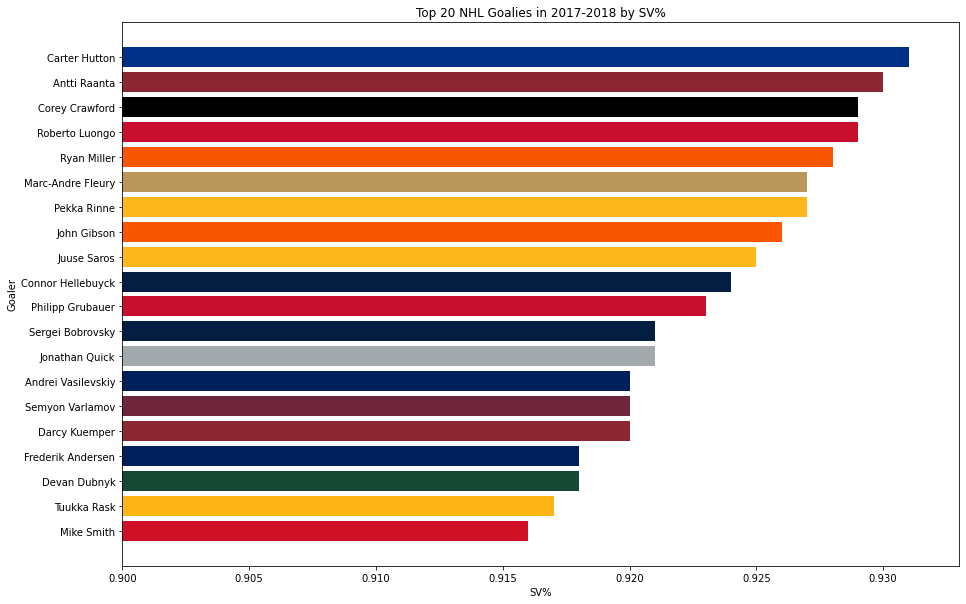

In [4]:
#prepping data for plotting
goalie17plot = goalie17[goalie17['GP'] >= 20].sort_values(by="SV%",ascending = False, inplace=False).head(20)
goalie17plot = goalie17plot.sort_values(by="SV%",ascending = True) #reordering for better plot
goalie17plot = goalie17plot.reset_index(drop=True)

# getting official team colors to help make the graph more readeable from here: https://usteamcolors.com/nhl-colors/
colors = {"CGY": "#ce1126", "BOS": "#fcb514", "MIN":"#154734", "TOR":"#00205b", "TOT":"#8c2633", "COL":"#6f263d", "TBL" :"#00205b","LAK":"#a2aaad", "CBJ":"#041e42", "WSH":"#c8102e","WPG":"#041e42","NSH":"#ffb81c","ANA":"#f95602", "VEG":"#b9975b","FLA":"#c8102e","CHI":"#000000","ARI":"#8c2633","STL":"#002f87"}
plt.figure(figsize=(15,10))
for i in range(len(goalie17plot)):
  plt.barh(goalie17plot["Player"][i], goalie17plot["SV%"][i], color = colors[goalie17plot["Tm"][i]])
plt.title("Top 20 NHL Goalies in 2017-2018 by SV%")
plt.xlim([.9,.933])
plt.xlabel("SV%")
plt.ylabel("Goaler")

